# Machine Learning techniques: Regression

I want to practise some regression I learned in class with several variables based in their correlation. 

Index:

<a class="anchor" id="index"></a>

1. [Multilinear regression to predict the number of active borrowers](#1)
2. [Ridge regularization](#2)
3. [Logarithmic transformation](#3)
4. [Min-max scaler](#4)

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import r2_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

%matplotlib inline

In [2]:
data = pd.read_csv('/home/user/Documents/OYI_PC_2and3/TRABAJO/Allwomen/Projects/Final Project/csv_datasets/reduced_datasets/data_unsupervised.csv')
data.shape

(3661, 33)

In [3]:
data.head()

,Unnamed: 0,MFI Name,Fiscal Year,Average loan balance per borrower / GNI per capita,Gross Loan Portfolio,Gross Loan Portfolio > Delinquency > One month or more,Number of active borrowers,Offices,Personnel,Portfolio at risk > 30 days,...,Health improvement,Housing,Adult education,Access financial services,Porverty reduction,Youngsters,Clients urban areas,Women,cluster,Cluster
0,0,1st Valley Bank,2011,0.5013,85055980.0,4029479.0,77543.0,34.0,494.0,0.0478,...,0,0,0,1,0,0,1,1,0,0
1,1,1st Valley Bank,2012,0.7125,112791709.0,6231245.0,72351.0,35.0,532.0,0.0552,...,0,0,0,1,0,0,1,1,0,0
2,2,1st Valley Bank,2013,0.7414,116329302.0,10507132.0,47981.0,35.0,562.0,0.0903,...,0,0,0,1,0,0,1,1,0,0
3,3,1st Valley Bank,2014,0.6669,116423597.0,16537965.0,53388.0,38.0,666.0,0.1420,...,0,0,0,1,0,0,1,1,0,0
4,4,1st Valley Bank,2018,0.8426,132682781.0,11559835.0,48153.0,51.0,769.0,0.0872,...,0,0,0,1,0,0,1,1,0,0


In [4]:
data.drop(columns=['Unnamed: 0', 'cluster'],axis=1,inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3661 entries, 0 to 3660
Data columns (total 31 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   MFI Name                                                3661 non-null   object 
 1   Fiscal Year                                             3661 non-null   int64  
 2   Average loan balance per borrower / GNI per capita      3661 non-null   float64
 3   Gross Loan Portfolio                                    3661 non-null   float64
 4   Gross Loan Portfolio > Delinquency > One month or more  3661 non-null   float64
 5   Number of active borrowers                              3661 non-null   float64
 6   Offices                                                 3661 non-null   float64
 7   Personnel                                               3661 non-null   float64
 8   Portfolio at risk > 30 days           

In [11]:
#I remove outliers detected by DBSCAN

data = data[data['Cluster'] != -1]

In [12]:
data.shape

(3657, 31)

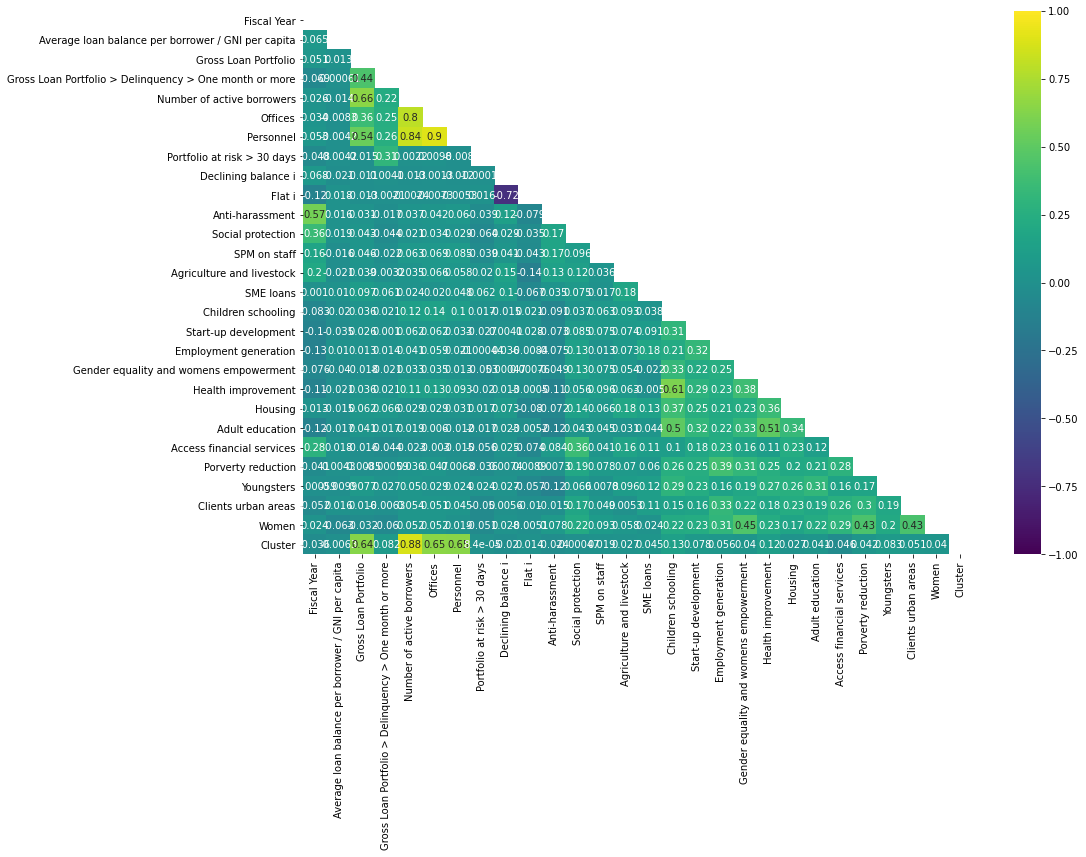

In [13]:
#And check again some correlations to study them

from Functions_EDA import *
corrCoef(data)

In [14]:
#I will remove the categorical variables 

data.drop(columns=['MFI Name', 'Country', 'Region'],axis=1,inplace=True)

In [15]:
data.shape

(3657, 28)

## 1. Multilinear regression to predict the number of active borrowers
<a class="anchor" id="1"></a>

[^Index](#index)

In [37]:
X = data.drop(['Number of active borrowers'], axis=1)
y = data['Number of active borrowers']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [42]:
print('Shape of the raw data (X): {}'.format (x.shape))
print('Shape of the TARGET variable (y): {}'.format (y.shape))

print('\nShape of the Train data (X_train): {}'.format (X_train.shape))
print('Shape of the Train data (y_train): {}'.format (y_train.shape))

print('\nShape of the Test data (X_test): {}'.format (X_test.shape))
print('Shape of the TARGET Test data (y_test): {}'.format (y_test.shape))

Shape of the raw data (X): (3657,)
Shape of the TARGET variable (y): (3657,)

Shape of the Train data (X_train): (2450, 27)
Shape of the Train data (y_train): (2450,)

Shape of the Test data (X_test): (1207, 27)
Shape of the TARGET Test data (y_test): (1207,)


In [43]:
mReg = LinearRegression()
mReg.fit(X_train, y_train)

LinearRegression()

In [44]:
print('Intercept of the Linear model', mReg.intercept_)
print(mReg.coef_)

Intercept of the Linear model -7957287.30041466
[ 3.94979851e+03 -5.69385569e+02  1.75831814e-04  2.29113966e-03
  2.24163097e+02  1.09506755e+02 -4.08321272e+04  1.47919022e+03
 -5.13591434e+03  1.71312665e+04 -3.54418770e+03  1.10239923e+04
 -1.44796509e+04 -3.13515589e+04  9.09532776e+03  7.33165601e+03
 -4.83218787e+03 -2.84671541e+03 -1.10844336e+04 -8.36672616e+03
  1.55807411e+03  1.60825373e+04 -3.62636935e+03 -2.21418178e+04
  8.82837034e+03  2.97941257e+04  2.54446627e+06]


In [45]:
y_pred = mReg.predict(X_test)

In [46]:
print ('The predicted values for your Test test are:', y_pred)
y_pred = np.array(y_pred).reshape(-1, 1) 

The predicted values for your Test test are: [ 86386.59629401 -24499.49240049  33843.86920454 ... -46534.6445716
  11053.12297362  29490.17126026]


In [47]:
df_results = pd.DataFrame({'MReg_Real': y_test, 'MReg_Predicted': y_pred.flatten()})
print(df_results)

          MReg_Real  MReg_Predicted
314    62717.000000    86386.596294
1412   23879.000000   -24499.492400
251   111376.735633    33843.869205
1146    2267.000000   -26741.290731
1843    3314.000000    20880.973530
...             ...             ...
2251   23802.000000    59822.932945
1204    2079.000000    11835.598402
819     3279.000000   -46534.644572
100      148.000000    11053.122974
3217   17549.000000    29490.171260

[1207 rows x 2 columns]


**Real values vs predicted values**

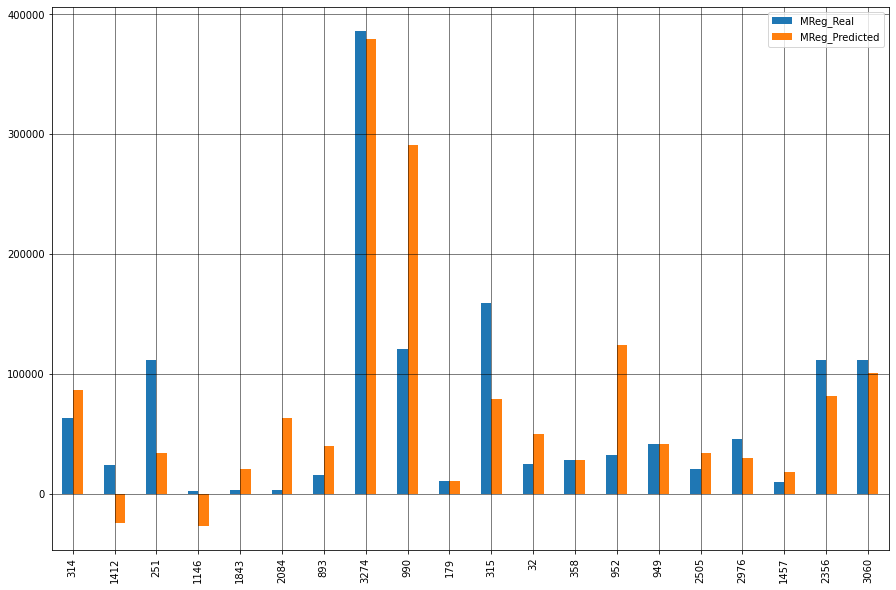

In [48]:
df1 = df_results.head(20)
df1.plot(kind='bar',figsize=(15,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    """
    Function created to evaluate the performance of the model, calculating MAE, MSE, RMSE and R2
    inputs: clf-> model to assess
            X_train, X_test
            y_train, y_test
            train -> Boolean index. If True just show the results regarding the TRAIN set, if False show TEST
    """
   
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n===========================================")
        MAE_train = metrics.mean_absolute_error(y_train, pred)
        MSE_train = metrics.mean_squared_error(y_train, pred)
        RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, pred))
        R2_train = r2_score(y_train, pred)
        
        print(f"MAE: {MAE_train:.4f}\n")
        print(f"MSE: {MSE_train:.4f}\n")
        print(f"RMSE: {RMSE_train:.4f}\n")
        print(f"R^2: {R2_train:.4f}\n")
        print('================================================================')
        cv_scores = cross_val_score(clf, X_train, 
                            y_train,cv=10, scoring='r2') # Let's define the K and the 

        print('Cross Validation R2_score: {}'.format(cv_scores.round(2)))
        print("\nAverage 10-Fold CV R2_score: {}".format(np.mean(cv_scores).round(3)))
        print()    
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n===========================================")        
        MAE_test = metrics.mean_absolute_error(y_test, pred)
        MSE_test = metrics.mean_squared_error(y_test, pred)
        RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, pred))
        R2_test = r2_score(y_test, pred)
        
        print(f"MAE: {MAE_test:.4f}\n")
        print(f"MSE: {MSE_test:.4f}\n")
        print(f"RMSE: {RMSE_test:.4f}\n")
        print(f"R^2: {R2_test:.4f}\n")

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def save_score(models, X_train, y_train, X_test, y_test):
    """
    Function created to evaluate the performance of the model, calculating MAE, MSE, RMSE and R2
    inputs: models-> models to assess
            X_train, X_test
            y_train, y_test
            train -> Boolean index. If True just show the results regarding the TRAIN set, if False show TEST
    """
    for clf in models:
        scores = []
        pred = clf.predict(X_train)
        MAE_train = metrics.mean_absolute_error(y_train, pred)
        MSE_train = metrics.mean_squared_error(y_train, pred)
        RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, pred))
        R2_train = r2_score(y_train, pred)
        
        
        
        cv_scores = cross_val_score(clf, X_train, 
                            y_train,cv=10, scoring='r2') # Let's define the K and the 

        pred = clf.predict(X_test)
        print("Test Result:\n===========================================")        
        MAE_test = metrics.mean_absolute_error(y_test, pred)
        MSE_test = metrics.mean_squared_error(y_test, pred)
        RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, pred))
        R2_test = r2_score(y_test, pred)
        
        scores.append(MAE_train, RMSE_train, R2_train,np.mean(cv_scores).round(3), MAE_test, RMSE_test, R2_test)
        return scores

In [51]:
print_score(mReg, X_train, y_train, X_test, y_test, train=True)
print_score(mReg, X_train, y_train, X_test, y_test, train=False)

Train Result:
MAE: 62733.9430

MSE: 27963789569.3314

RMSE: 167223.7709

R^2: 0.9171

Cross Validation R2_score: [0.89 0.95 0.91 0.98 0.94 0.93 0.92 0.78 0.84 0.91]

Average 10-Fold CV R2_score: 0.904

Test Result:
MAE: 63454.5400

MSE: 33574562247.8511

RMSE: 183233.6275

R^2: 0.8795



Results are very good, but I want to try if I can try some sort of regularization.

## 2. Ridge regularization
<a class="anchor" id="2"></a>

[^Index](#index)

In [52]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

#I will try with alpha value of 10 to see if the model improves

rr = Ridge(alpha = 10)

rr.fit(X_train, y_train)

Ridge(alpha=10)

In [55]:
print_score(rr, X_train, y_train, X_test, y_test, train=True)
print_score(rr, X_train, y_train, X_test, y_test, train=False)
print("The result doesn't seem to get better")

Train Result:
MAE: 70336.8323

MSE: 34500661534.5517

RMSE: 185743.5370

R^2: 0.8978

Cross Validation R2_score: [0.87 0.94 0.85 0.97 0.93 0.91 0.92 0.78 0.8  0.86]

Average 10-Fold CV R2_score: 0.883

Test Result:
MAE: 75722.8330

MSE: 45755253113.9394

RMSE: 213904.7758

R^2: 0.8358

The result doesn't seem to get better


In [54]:
#I try the Ridge regularization with different alpha values

regr_cv = RidgeCV(alphas=[0.1,0.5, 1.0, 10.0, 12.0, 15.0, 18.0, 20.0])
regr_cv

RidgeCV(alphas=array([ 0.1,  0.5,  1. , 10. , 12. , 15. , 18. , 20. ]))

In [58]:
model_cv = regr_cv.fit(X_train, y_train)
model_cv
print('My model is selecting...')
print(model_cv.alpha_)

My model is selecting...
0.1


In [59]:
#I will try to build a model with alpha = 0.1 as suggested

rr = Ridge(alpha = 0.1)

rr.fit(X_train, y_train)

Ridge(alpha=0.1)

In [60]:
print_score(rr, X_train, y_train, X_test, y_test, train=True)
print_score(rr, X_train, y_train, X_test, y_test, train=False)
print('I almost get the same results from the beginning')

Train Result:
MAE: 62680.8876

MSE: 27966787959.2850

RMSE: 167232.7359

R^2: 0.9171

Cross Validation R2_score: [0.89 0.95 0.91 0.98 0.94 0.93 0.92 0.78 0.84 0.91]

Average 10-Fold CV R2_score: 0.904

Test Result:
MAE: 63462.7979

MSE: 33634551311.0896

RMSE: 183397.2500

R^2: 0.8793



As Ridge is not helping me to get better results I will try to apply a logarithmic scale to the target variable.

## 3. Logarithmic transformation
<a class="anchor" id="3"></a>

[^Index](#index)

In [61]:
y = np.log(y)

In [62]:
y

0       11.258588
1       11.189285
2       10.778560
3       10.885341
4       10.782139
          ...    
3656     9.278840
3657     9.585896
3658     7.473069
3659     9.000113
3660     8.701845
Name: Number of active borrowers, Length: 3657, dtype: float64

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 7)

In [64]:
print('Shape of the raw data (X): {}'.format (X.shape))
print('Shape of the TARGET variable (y): {}'.format (y.shape))

print('\nShape of the Train data (X_train): {}'.format (X_train.shape))
print('Shape of the Train data (y_train): {}'.format (y_train.shape))

print('\nShape of the Test data (X_test): {}'.format (X_test.shape))
print('Shape of the TARGET Test data (y_test): {}'.format (y_test.shape))

Shape of the raw data (X): (3657, 27)
Shape of the TARGET variable (y): (3657,)

Shape of the Train data (X_train): (2450, 27)
Shape of the Train data (y_train): (2450,)

Shape of the Test data (X_test): (1207, 27)
Shape of the TARGET Test data (y_test): (1207,)


In [65]:
mReg = LinearRegression()
mReg.fit(X_train, y_train)

LinearRegression()

In [66]:
print('Intercept of the Linear model', mReg.intercept_)

Intercept of the Linear model 87.1001489071724


In [67]:
print(mReg.coef_)

[-3.88400378e-02 -2.56513714e-02  2.03917688e-09 -3.13324248e-09
  1.89310250e-03  4.90129168e-04 -4.84397564e-01 -9.18855122e-02
  9.98070825e-02  5.73406551e-01  2.96948108e-01  4.40457279e-01
  2.55872493e-02 -1.49308113e-01  2.33788329e-01 -1.51370841e-01
 -2.14999192e-01  3.27760448e-01  2.94910594e-01 -6.65436148e-02
 -2.19591525e-01 -1.76738374e-02  1.20740427e-01 -1.49785409e-01
 -5.38675458e-02  6.56553972e-02 -6.60615920e+00]


In [69]:
y_pred = mReg.predict(X_test)
y_pred = np.array(y_pred).reshape(-1, 1) 

In [71]:
print_score(mReg, X_train, y_train, X_test, y_test, train=True)
print_score(mReg, X_train, y_train, X_test, y_test, train=False)

print("No way! I'm getting worse results applying the logarithm to the y")

Train Result:
MAE: 1.2121

MSE: 2.3764

RMSE: 1.5416

R^2: 0.4153

Cross Validation R2_score: [ 0.35  0.42  0.33  0.37  0.39  0.37  0.34  0.45 -0.68  0.45]

Average 10-Fold CV R2_score: 0.279

Test Result:
MAE: 1.2350

MSE: 2.6182

RMSE: 1.6181

R^2: 0.3823

No way! I'm getting worse results applying the logarithm to the y


I will try to Ridge again and see if there's any improvement on the model:

In [72]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

rr = Ridge(alpha = 10)

rr.fit(X_train, y_train)

Ridge(alpha=10)

In [73]:
print_score(rr, X_train, y_train, X_test, y_test, train=True)
print_score(rr, X_train, y_train, X_test, y_test, train=False)

Train Result:
MAE: 1.2326

MSE: 2.4203

RMSE: 1.5557

R^2: 0.4045

Cross Validation R2_score: [0.34 0.41 0.3  0.38 0.36 0.37 0.33 0.44 0.35 0.42]

Average 10-Fold CV R2_score: 0.371

Test Result:
MAE: 1.2499

MSE: 2.6123

RMSE: 1.6163

R^2: 0.3837



In [74]:
#I try the Ridge regularization with different alpha values

regr_cv = RidgeCV(alphas=[0.1,0.5, 1.0, 10.0, 12.0, 15.0, 18.0, 20.0])
regr_cv

RidgeCV(alphas=array([ 0.1,  0.5,  1. , 10. , 12. , 15. , 18. , 20. ]))

In [75]:
model_cv = regr_cv.fit(X_train, y_train)
model_cv
print(model_cv.alpha_)

10.0


In [76]:
rr = Ridge(alpha = 10)

rr.fit(X_train, y_train)

Ridge(alpha=10)

In [77]:
print_score(rr, X_train, y_train, X_test, y_test, train=True)
print_score(rr, X_train, y_train, X_test, y_test, train=False)

print("Definitely this is not getting better")

Train Result:
MAE: 1.2326

MSE: 2.4203

RMSE: 1.5557

R^2: 0.4045

Cross Validation R2_score: [0.34 0.41 0.3  0.38 0.36 0.37 0.33 0.44 0.35 0.42]

Average 10-Fold CV R2_score: 0.371

Test Result:
MAE: 1.2499

MSE: 2.6123

RMSE: 1.6163

R^2: 0.3837



As a last chance to improve the metrics I will use the min-max scaler to reduce the dimensionality
of the variables involved in the model.

## 4. Min-max scaler
<a class="anchor" id="4"></a>

[^Index](#index)

In [79]:
X=data.drop(['Number of active borrowers'], axis=1) 
y=data['Number of active borrowers']

In [80]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 7)

In [82]:
print('Shape of the raw data (X): {}'.format (X.shape))
print('Shape of the TARGET variable (y): {}'.format (y.shape))

print('\nShape of the Train data (X_train): {}'.format (X_train.shape))
print('Shape of the Train data (y_train): {}'.format (y_train.shape))

print('\nShape of the Test data (X_test): {}'.format (X_test.shape))
print('Shape of the TARGET Test data (y_test): {}'.format (y_test.shape))

Shape of the raw data (X): (3657, 27)
Shape of the TARGET variable (y): (3657,)

Shape of the Train data (X_train): (2450, 27)
Shape of the Train data (y_train): (2450,)

Shape of the Test data (X_test): (1207, 27)
Shape of the TARGET Test data (y_test): (1207,)


In [83]:
mReg = LinearRegression()
mReg.fit(X_train, y_train)

LinearRegression()

In [84]:
print('Intercept of the Linear model', mReg.intercept_)
print('Coefficient of the Linear model', mReg.coef_)

Intercept of the Linear model -31699.634374292276
Coefficient of the Linear model [ 3.05048615e+04 -1.62330048e+05  5.86758826e+05  5.31603347e+05
  3.14044114e+05  3.53912427e+06 -1.23232096e+05  5.50532660e+02
 -9.24730534e+03  1.97032225e+04  5.03589354e+03  6.39677244e+03
 -1.74990515e+04 -2.22232140e+04  5.44904136e+03 -2.00711877e+03
  2.57389063e+03 -5.94158212e+03  3.61319322e+03 -3.33930630e+03
  4.96281645e+03  6.32253402e+03  1.24311262e+03 -2.39793823e+04
 -6.13923564e+03  4.17176879e+04  5.09018417e+06]


In [85]:
print_score(mReg, X_train, y_train, X_test, y_test, train=True)
print_score(mReg, X_train, y_train, X_test, y_test, train=False)

Train Result:
MAE: 61505.4628

MSE: 29826857119.7590

RMSE: 172704.5371

R^2: 0.8942

Cross Validation R2_score: [0.65 0.5  0.96 0.87 0.83 0.77 0.89 0.92 0.85 0.84]

Average 10-Fold CV R2_score: 0.808

Test Result:
MAE: 61300.5265

MSE: 29579831922.5512

RMSE: 171987.8831

R^2: 0.9244



After doing the lorgarithmic transformation seemed the results got worst, but after scaling I can see the results given are pretty the same my first model. 